In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("D:\\Data Science\\Projects\\Salary\\glassdoor_jobs.csv")

In [3]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
df.shape

(956, 15)

In [5]:
#I have to handle:
# salary parsing
# company name text only
# add Satae field
# age of company
# parsing of job description (python, etc)

In [6]:
# 1- Salary:

#there are negative values (-1) in salary estimate column so I have to get rid of it

df=df[df['Salary Estimate'] != '-1']

In [7]:
df.shape

(742, 15)

In [8]:
# Now I have to get rid of texts in salary field like : $ , k and (Glassdoor est.)

salary=df['Salary Estimate'].apply(lambda x:x.split('(')[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
950    $58K-$111K 
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
955    $61K-$126K 
Name: Salary Estimate, Length: 742, dtype: object

In [9]:
# Notice that I got rid of (Glassdoor est.)

In [10]:
#Now I will get rid of: k and $:

salary_kd=salary.apply(lambda x:x.replace('K','').replace('$',''))
salary_kd

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
950    58-111 
951    72-133 
952     56-91 
953    95-160 
955    61-126 
Name: Salary Estimate, Length: 742, dtype: object

In [11]:
# we still have 2 issues in salary estimate field:
# 1st: some values like this: Employer Provided Salary:$150K-$160K
# 2nd: some values like this: num-num per hour


df['hourly']=df['Salary Estimate'].apply(lambda x:1 if 'per hour' in x.lower() else 0)
df['hourly'].unique()

array([0, 1], dtype=int64)

In [12]:
df['employer_provided']=df['Salary Estimate'].apply(lambda x:1 if 'employer provided salary' in x.lower() else 0)
df['employer_provided'].unique()

array([0, 1], dtype=int64)

In [13]:
min_hr=salary_kd.apply(lambda x:x.lower().replace('per hour','').replace('employer provided salary',''))

In [14]:
min_hr.unique()

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ', '93-149 ',
       '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ', '74-138 ',
       '64-112 ', '68-129 ', '52-113 ', '110-150', ':150-160', '158-211 ',
       '20-39 ', '56-117 ', '63-99 ', '68-114 ', '41-95 ', '86-144 ',
       '80-139 ', '56-95 ', '120-189 ', '111-176 ', '84-146 ', '107-172 ',
       '49-85 ', '61-109 ', '88-148 ', '60-99 ', '41-72 ', '96-161 ',
       '65-130 ', '52-81 ', '139-220 ', '50-102 ', '85-139 ', '74-122 ',
       '99-157 ', '79-222 ', '57-118 ', '86-141 ', '94-154 ', '37-76 ',
       '100-160 ', '55-100 ', '60-114 ', '39-68 ', '64-107 ', '31-65 ',
       '34-62 ', '117-231 ', '79-134 ', '52-93 ', '55-

In [15]:
# we notice that some values start with : so we have to get rid of it first

min_hr=min_hr.apply(lambda x:x.replace(':',''))
min_hr.unique()


array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ', '93-149 ',
       '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ', '74-138 ',
       '64-112 ', '68-129 ', '52-113 ', '110-150', '150-160', '158-211 ',
       '20-39 ', '56-117 ', '63-99 ', '68-114 ', '41-95 ', '86-144 ',
       '80-139 ', '56-95 ', '120-189 ', '111-176 ', '84-146 ', '107-172 ',
       '49-85 ', '61-109 ', '88-148 ', '60-99 ', '41-72 ', '96-161 ',
       '65-130 ', '52-81 ', '139-220 ', '50-102 ', '85-139 ', '74-122 ',
       '99-157 ', '79-222 ', '57-118 ', '86-141 ', '94-154 ', '37-76 ',
       '100-160 ', '55-100 ', '60-114 ', '39-68 ', '64-107 ', '31-65 ',
       '34-62 ', '117-231 ', '79-134 ', '52-93 ', '55-1

In [16]:
# Now I will take the first side and minimum salary and the second one as maximum salary

df['min_salary']=min_hr.apply(lambda x: int(x.split('-')[0]))
df['max_salary']=min_hr.apply(lambda x: int(x.split('-')[1]))

In [17]:
df['min_salary'].unique()

array([ 53,  63,  80,  56,  86,  71,  54,  38, 120, 126,  64, 106,  46,
        83, 102,  67, 118, 110,  81,  73, 109,  75,  34,  72,  93,  85,
        77,  82, 115,  74,  68,  52, 150, 158,  20,  41, 111,  84, 107,
        49,  61,  88,  60,  96,  65, 139,  50,  99,  79,  57,  94,  37,
       100,  55,  39,  31, 117,  40,  89, 200, 121,  76,  91,  95,  43,
        29,  26, 112,  51, 113,  59,  44, 124, 131, 132,  17,  42, 116,
        48, 105,  98,  21, 114, 108,  90, 138, 190,  35,  18,  69,  66,
        15,  33,  62, 127,  78,  45,  70, 130,  92,  36,  97,  24, 202,
        32,  87,  25, 101, 125,  10,  47, 176, 135, 129, 119,  27,  58,
       136, 171], dtype=int64)

In [18]:
df['max_salary'].unique()

array([ 91, 112,  90,  97, 143, 119,  93, 142,  84, 160, 201, 106, 172,
        85, 144, 190, 137, 189, 175, 111, 130, 139, 105, 177, 110, 124,
        61, 120, 149, 140, 135, 132, 180, 138, 129, 113, 150, 211,  39,
       117,  99, 114,  95, 176, 146, 109, 148,  72, 161,  81, 220, 102,
       122, 157, 222, 118, 141, 154,  76, 100,  68, 107,  65,  62, 231,
       134, 116, 123,  73, 164, 153, 275,  71, 193, 163, 101, 133, 125,
       173, 159,  50,  55, 182, 223, 145, 115, 136, 167, 204,  78, 207,
       174,  80,  24,  82, 185, 198, 250,  34, 206, 183, 166, 179, 127,
       224,  25,  66,  86,  92, 103,  64,  16, 199, 126,  63, 194,  74,
       208, 162, 209,  89, 202,  57, 200, 196, 171, 306,  59, 158,  28,
       155,  98,  96, 210,  77, 221, 147, 151, 203, 178,  29,  17, 239,
        88, 181, 289, 188, 228, 184, 108, 215, 121, 238, 187, 165,  69,
        48,  79,  87, 272, 104,  47,  67], dtype=int64)

In [19]:
df['avg_salary']=(df['min_salary']+df['max_salary'])/2

In [20]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5


In [21]:
# 2- company name:

# We notice that the company name contains a number identical to the rating of this company
# and when it doesn't have a rating (reating = -1) it doesn't contain this number
# so I will take this into consediration

df['company_txt']=df.apply(lambda x:x['Company Name'] if x['Rating'] <0 else x['Company Name'][0:-3], axis=1)
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n


In [22]:
# 3- add State field:

df['job_state']=df['Location'].apply(lambda x:x.split(',')[1])
df['job_state'].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' Los Angeles', ' UT', ' TN', ' DE', ' ID', ' RI',
       ' IA', ' SC', ' KS'], dtype=object)

In [23]:
df['job_state'].value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 NC              21
 WA              21
 NJ              17
 FL              16
 OH              14
 TN              13
 CO              11
 DC              11
 WI              10
 UT              10
 IN              10
 AZ               9
 MO               9
 AL               8
 KY               6
 GA               6
 MI               6
 DE               6
 CT               5
 IA               5
 NE               4
 LA               4
 OR               4
 KS               3
 NM               3
 ID               2
 MN               2
 SC               1
 RI               1
 Los Angeles      1
Name: job_state, dtype: int64

In [24]:
df['same_state'] = df.apply(lambda x: 1 if x.Location  == x.Headquarters else 0, axis=1)
df['same_state'].unique()

array([0, 1], dtype=int64)

In [25]:
# 3- age of company

# there are some fields in Founded column have value: -1


df['age'] = df['Founded'].apply(lambda x: x if x<1 else 2022-x)
df['age'].value_counts()


-1      50
 12     32
 14     31
 26     27
 16     24
        ..
 123     1
 120     1
 108     1
 105     1
 278     1
Name: age, Length: 102, dtype: int64

In [26]:
# 4- parsing of job description (python, etc)

df['python_yn']=df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['python_yn'].value_counts()

1    392
0    350
Name: python_yn, dtype: int64

In [27]:
df['R_yn']=df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
df['R_yn'].value_counts()

0    740
1      2
Name: R_yn, dtype: int64

In [28]:
df['spark_yn']=df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df['spark_yn'].value_counts()

0    575
1    167
Name: spark_yn, dtype: int64

In [29]:
df['aws_yn']=df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df['aws_yn'].value_counts()

0    566
1    176
Name: aws_yn, dtype: int64

In [30]:
df['excel_yn']=df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['excel_yn'].value_counts()

1    388
0    354
Name: excel_yn, dtype: int64

In [31]:
df.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,72.0,Tecolote Research\n,NM,0,49,1,0,0,0,1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,87.5,University of Maryland Medical System\n,MD,0,38,1,0,0,0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,85.0,KnowBe4\n,FL,1,12,1,0,1,0,1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,76.5,PNNL\n,WA,1,57,1,0,0,0,0
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,114.5,Affinity Solutions\n,NY,1,24,1,0,0,0,1
5,5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,...,95.0,CyrusOne\n,TX,1,22,1,0,0,1,1
6,6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,...,73.5,ClearOne Advantage\n,MD,1,14,0,0,0,0,1
7,7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,...,114.0,Logic20/20\n,CA,0,17,1,0,1,1,1
8,8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,...,61.0,Rochester Regional Health\n,NY,1,8,0,0,0,0,0
9,9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,...,140.0,<intent>\n,NY,1,13,1,0,1,0,0


In [32]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [33]:
df_out = df.drop('Unnamed: 0',axis=1)

In [34]:
df_out.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [35]:
df_out.to_csv("D:\\Data Science\\Projects\\Salary\\salary_data_cleaned.csv",index=False)

<h2> EDA </h2>

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("D:\\Data Science\\Projects\\Salary\\salary_data_cleaned.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,49,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,38,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,12,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,57,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,24,1,0,0,0,1


In [38]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [39]:
#before I start EDA there are some columns need to be treated

#1-job title

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return "na"

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
        
    

In [40]:
df['job_simp']=df['Job Title'].apply(title_simplifier)
df['job_simp'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [41]:
df['seniority']=df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [42]:
# 2- fix state los Angeles

df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 NC              21
 WA              21
 NJ              17
 FL              16
 OH              14
 TN              13
 CO              11
 DC              11
 WI              10
 UT              10
 IN              10
 AZ               9
 MO               9
 AL               8
 KY               6
 GA               6
 MI               6
 DE               6
 CT               5
 IA               5
 NE               4
 LA               4
 OR               4
 KS               3
 NM               3
 ID               2
 MN               2
 SC               1
 RI               1
 Los Angeles      1
Name: job_state, dtype: int64

In [43]:
df['job_state']=df['job_state'].apply(lambda x: x.strip() if x.strip().lower() !='los angeles' else 'CA')
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
IN     10
WI     10
UT     10
AZ      9
MO      9
AL      8
DE      6
MI      6
KY      6
GA      6
CT      5
IA      5
NE      4
OR      4
LA      4
KS      3
NM      3
MN      2
ID      2
SC      1
RI      1
Name: job_state, dtype: int64

In [44]:
# 3- job description length

df['desc_len']=df["Job Description"].apply(lambda x:len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [45]:
# 4- compititor counts

df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [46]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!= '-1' else 0)
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [47]:
# 5- hourly wage to annual

df['min_salary']= df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)

In [48]:
df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,24
177,1,42,34
197,1,36,25
202,1,42,34
210,1,30,25
246,1,34,24
271,1,42,34
337,1,36,25
345,1,48,39
357,1,42,34


In [49]:
df['max_salary']= df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [50]:
df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [51]:
# 6- remove new line from company_txt

df['company_txt']= df['company_txt'].apply(lambda x: x.replace("\n",''))
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [52]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,49,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,38,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,12,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,57,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,24,1,0,0,0,1,data scientist,na,2728,3


In [53]:
# Now I will do EDA

In [54]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,48.456873,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.900445,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [55]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

<AxesSubplot:>

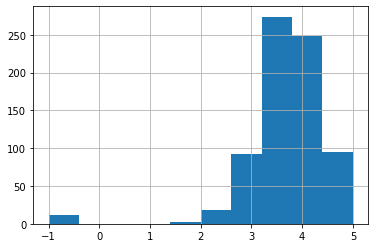

In [56]:
df.Rating.hist()

<AxesSubplot:>

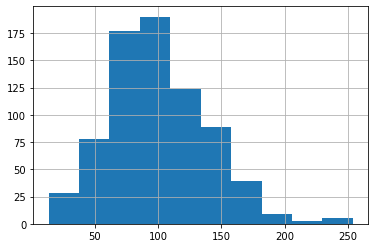

In [57]:
df.avg_salary.hist()

<AxesSubplot:>

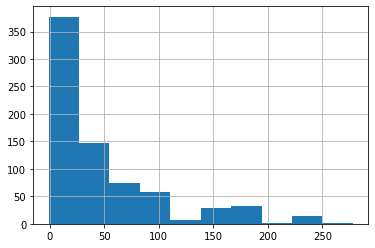

In [58]:
df.age.hist()

<AxesSubplot:>

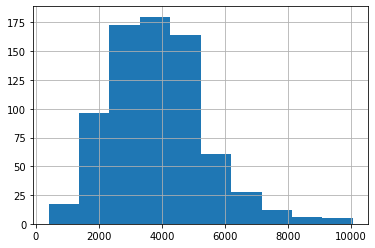

In [59]:
df.desc_len.hist()

<AxesSubplot:>

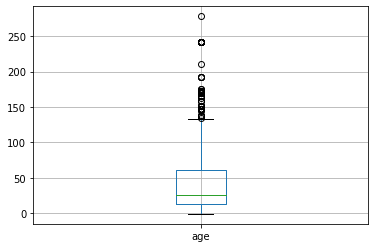

In [60]:
df.boxplot(column='age')

<AxesSubplot:>

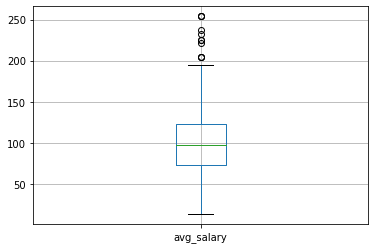

In [61]:
df.boxplot(column='avg_salary')

<AxesSubplot:>

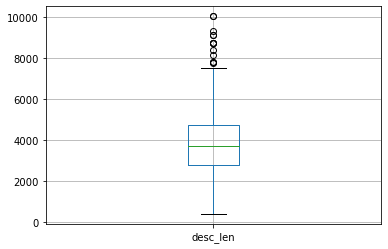

In [62]:
df.boxplot(column='desc_len')

<AxesSubplot:>

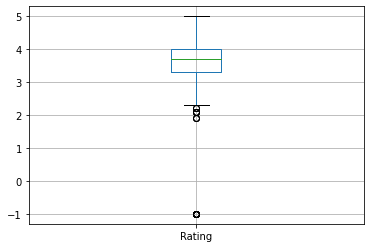

In [63]:
df.boxplot(column='Rating')

In [64]:
corr=df[['age','avg_salary','Rating','desc_len','num_comp']].corr()
corr

,age,avg_salary,Rating,desc_len,num_comp
age,1.000000,0.019492,0.024665,0.164461,0.128272
avg_salary,0.019492,1.000000,0.013492,0.078808,0.093813
Rating,0.024665,0.013492,1.000000,-0.012281,0.027190
desc_len,0.164461,0.078808,-0.012281,1.000000,0.104620
num_comp,0.128272,0.093813,0.027190,0.104620,1.000000


<AxesSubplot:>

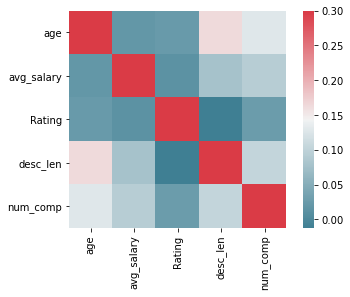

In [65]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,vmax=.3,cmap=cmap,square=True)

In [66]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [67]:
df_cat=df[['Location','Headquarters','Size','Type of ownership','Industry','Sector','Revenue','company_txt','job_state',
          'spark_yn','aws_yn','excel_yn','job_simp','seniority']]

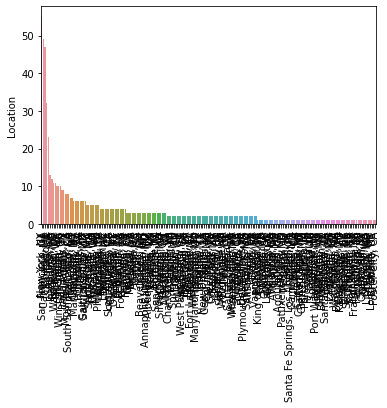

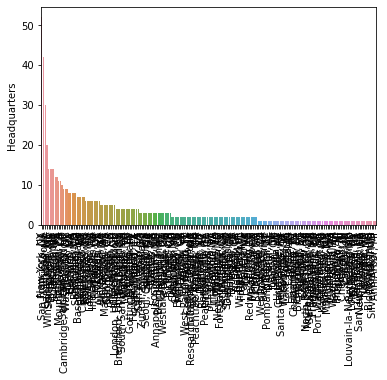

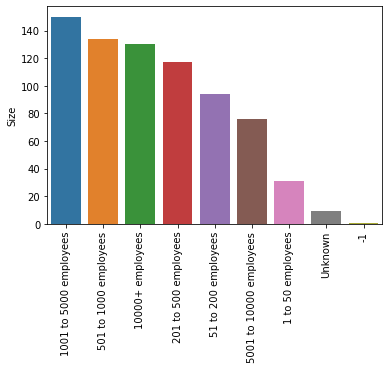

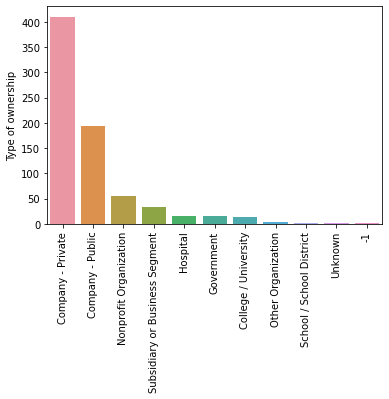

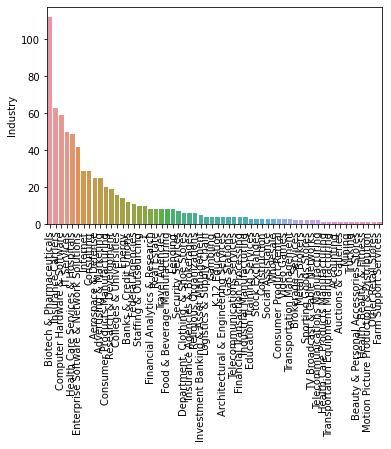

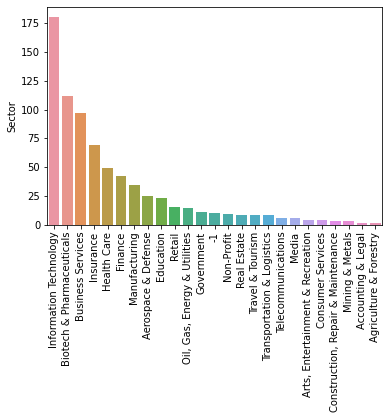

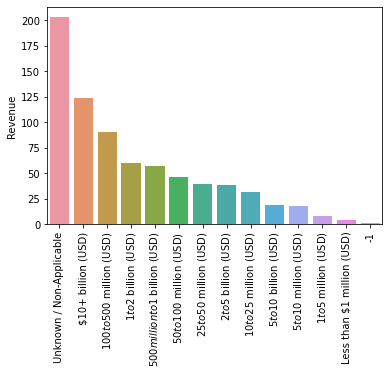

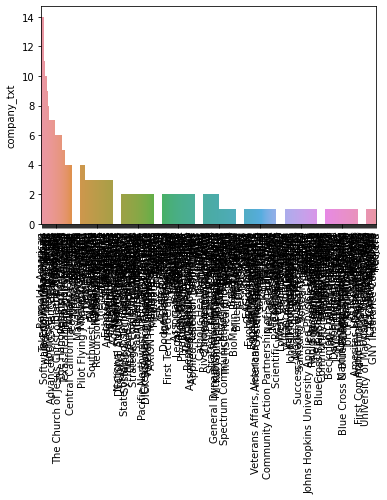

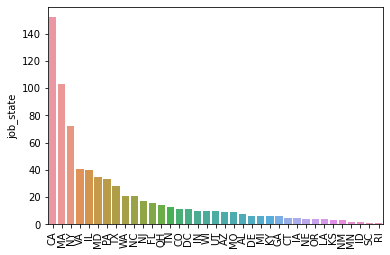

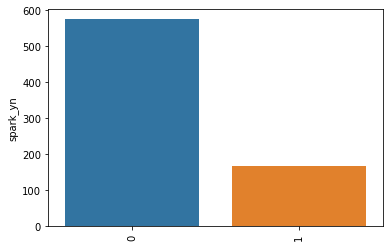

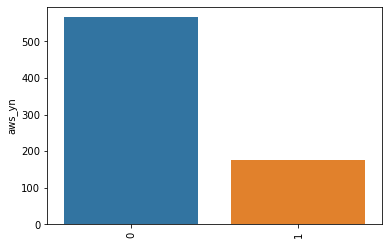

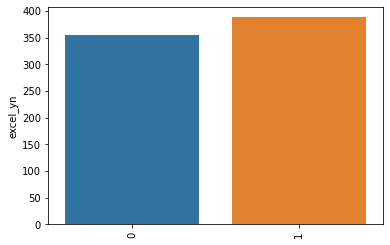

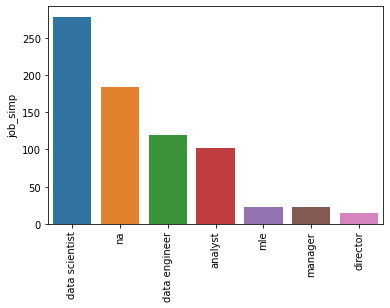

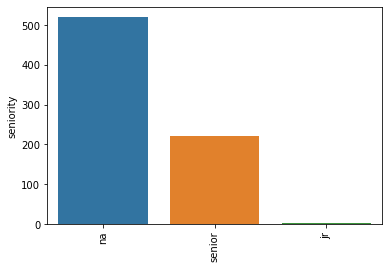

In [68]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    chart=sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [69]:
pd.pivot_table(df,index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [70]:
pd.pivot_table(df,index=['job_simp','seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [71]:
pd.pivot_table(df,index='job_state', values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [72]:
pd.set_option('display.max_rows',None)
pd.pivot_table(df,index=['job_state','job_simp'], values='avg_salary', aggfunc='count').sort_values('avg_salary',ascending=False)

avg_salary
job_state job_simp                  
CA        data scientist          68
MA        na                      46
NY        data scientist          40
MA        data scientist          30
CA        na                      27
          data engineer           25
VA        data scientist          18
CA        analyst                 18
WA        data scientist          17
MD        na                      16
IL        data scientist          15
NY        analyst                 14
MD        data scientist          13
TX        data scientist          13
NC        na                      12
MA        data engineer           12
NY        na                      12
VA        data engineer           10
TN        data engineer           10
CA        manager                  9
IL        data engineer            8
TX        data engineer            8
PA        na                       8
          analyst                  8
          mle                      7
TX        na                       7
FL        data scientist           7
OH        data scientist           7
NC        data engineer            6
MA        director                 6
IL        na                       6
          director                 6
NJ        analyst                  6
FL        analyst                  6
DE        na                       6
PA        data scientist           6
VA        analyst                  6
DC        data scientist           5
CA        mle                      5
AZ        data engineer            5
MA        manager                  5
VA        na                       5
AL        analyst                  5
NY        data engineer            4
OH        analyst                  4
NJ        data scientist           4
NE        na                       4
UT        analyst                  4
MI        data scientist           4
MA        analyst                  4
KY        na                       4
DC        data engineer            4
IN        data engineer            4
          na                       4
WI        na                       4
MD        data engineer            3
NM        data scientist           3
IA        data engineer            3
GA        data scientist           3
OH        na                       3
OR        data scientist           3
FL        data engineer            3
PA        manager                  3
CT        na                       3
CO        na                       3
          data scientist           3
          data engineer            3
UT        data engineer            3
          data scientist           3
WA        analyst                  3
WI        analyst                  3
          data scientist           3
IL        analyst                  3
GA        na                       3
MD        analyst                  3
MO        data scientist           3
          na                       3
KS        mle                      3
NC        data scientist           3
TN        analyst                  2
MO        analyst                  2
VA        mle                      2
CT        data scientist           2
NJ        manager                  2
AL        na                       2
DC        analyst                  2
LA        data engineer            2
IN        data scientist           2
KY        data scientist           2
MI        manager                  2
NJ        data engineer            2
IA        analyst                  2
NY        mle                      2
IL        mle                      2
ID        analyst                  2
NJ        director                 2
AZ        na                       2
WA        na                       1
CO        analyst                  1
MN        analyst                  1
AL        data engineer            1
AZ        analyst                  1
          data scientist           1
NJ        na                       1
MN        data engineer            1
MO        manager                  1
CO        mle                 

In [73]:
pd.pivot_table(df[df['job_simp']=='data scientist'],index='job_state', values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [74]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [75]:
df_pivots=df[['Rating','Industry','Sector','Revenue','num_comp','hourly','employer_provided','python_yn','R_yn','spark_yn',
             'aws_yn','excel_yn','Type of ownership','avg_salary']]

In [76]:
for i in df_pivots.columns:
    print(i)
    if(i != 'avg_salary'):
        print(pd.pivot_table(df_pivots,index=i, values='avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

<h2> Model building </h2>

In [77]:
import numpy as np

In [78]:
# In this step we have to:
# 1- choose relevent columns
# 2- get dummy variables
# 3- train test splits
# 4- Linear regression
# 5- Lasso
# 6- Random forrest
# 7- Tunning models using GridSearch


In [79]:
# 1- choose relevent columns

df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [80]:
df_model=df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
           'job_state','same_state','age','python_yn','aws_yn','spark_yn','excel_yn','job_simp','seniority','desc_len',]]
df_model.shape

(742, 20)

In [81]:
# 2- get dummy variables

df_dm=pd.get_dummies(df_model)
df_dm.shape

(742, 178)

In [82]:
# 3- train test splits

from sklearn.model_selection import train_test_split

X=df_dm.drop('avg_salary',axis=1)
y=df_dm['avg_salary']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [83]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(593, 177)
(149, 177)
(593,)
(149,)


In [84]:
# 4- Linear regression

import statsmodels.api as sm
x_sm=sm.add_constant(X)
model = sm.OLS(y,x_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           1.48e-94
Time:                        09:23:29   Log-Likelihood:                -3311.7
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6076      6.719      6.490      0.000      30.411      56.804
Rating                                                3.6057      1.937      1.861      0.063      -0.199       7.411
num_comp                                              2.2508      0.868      2.593      0.010       0.546       3.956
hourly                                              -36.5762      9.173     -3.987      0.000     -54.591     -18.561
employer_provided                                    31.3671     11.524      2.722      0.007       8.734      54.000
same_state                                            2.4830      2.619      0.948      0.343      -2.660       7.626
age                                                   0.0349      0.030      1.164      0.245      -0.024       0.094
python_yn                                             8.1367      2.523      3.224      0.001       3.181      13.093
aws_yn                                                1.1225      2.736      0.410      0.682      -4.251       6.495
spark_yn                                             -0.5713      2.921     -0.196      0.845      -6.307       5.164
excel_yn                                             -0.4029      2.268     -0.178      0.859      -4.856       4.051
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6169      8.629      1.578      0.115      -3.331      30.564
Size_1 to 50 employees                                1.1080      6.501      0.170      0.865     -11.659      13.875
Size_10000+ employees                                -2.8973      5.800     -0.500      0.618     -14.289       8.494
Size_1001 to 5000 employees                           6.1265      3.879      1.579      0.115      -1.492      13.745
Size_201 to 500 employees                             2.2468      3.873      0.580      0.562      -5.360       9.853
Size_5001 to 10000 employees                         -3.8778      5.442     -0.713      0.476     -14.566       6.810
Size_501 to 1000 employees                            2.1683      4.059      0.534      0.593      -5.804      10.140
Size_51 to 200 employees                              4.1877      4.422      0.947      0.344      -4.496      12.872
Size_Unknown                                         20.9284     13.993      1.496      0.135      -6.552      48.409
Type of ownership_-1                                 13.6169      8.629      1.578      0.115      -3.331      30.564
Type of ownership_College / University                6.4566     17.737      0.364      0.716     -28.378      41.292
Type of ownersh

In [85]:
# P-values and coefficients in regression analysis work together to tell you which relationships in your model are 
#statistically significant and the nature of those relationships. 
#The coefficients describe the mathematical relationship between each independent variable and the dependent variable.
#The p-values for the coefficients indicate whether these relationships are statistically significant.
# when p-value for a coefficient is less than 0.05 means this coefficient is statistically significant
# for example: Rating is Not statistically significant , but num_comp and hourly are.


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm=LinearRegression()
lm.fit(X_train,y_train)
cross_val_score(lm,X_train,y_train, scoring='neg_mean_absolute_error', cv=3)  # by default cv=5

array([-18.24220986, -18.41603896, -21.6824348 ])

In [88]:
np.mean(cross_val_score(lm,X_train,y_train, scoring='neg_mean_absolute_error', cv=3))

-19.44689454187828

In [89]:
#cross_val_score evaluates the score using cross validation by randomly splitting the training sets 
#into distinct subsets called folds, then it trains and evaluated the model on the folds, 
#picking a different fold for evaluation every time and training on the other folds.

#cv_score = cross_val_score(model, data, target, scoring, cv)

#KFold procedure divides a limited dataset into k non-overlapping folds. 
#Each of the k folds is given an opportunity to be used as a held-back test set, 
#whilst all other folds collectively are used as a training dataset. 
#A total of k models are fit and evaluated on the k hold-out test sets and the mean performance is reported.

#cv = KFold(n_splits=10, random_state=1, shuffle=True)

#cv_score = cross_val_score(model, data, target, scoring, cv=cv)

#where model is your model on which you want to evaluate, data is training data, 
#target is target variable, scoring parameter controls what metric applied to the estimator applied and cv is the number of splits.



In [90]:
# 5- Lasso

from sklearn.linear_model import Lasso

lm_l=Lasso()
cross_val_score(lm_l,X_train,y_train, scoring='neg_mean_absolute_error', cv=3)  # by default cv=5

array([-22.29562339, -18.70351864, -21.81586888])

In [91]:
np.mean(cross_val_score(lm_l,X_train,y_train, scoring='neg_mean_absolute_error', cv=3))  # by default cv=5

-20.93833697013386

In [92]:
alpha=[]
error=[]

for i in range(1,100):
    alpha.append(i/100)
    lml=Lasso(alpha=i/100)
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring='neg_mean_absolute_error', cv=3)))

C:\Users\A7mad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.760e+01, tolerance: 5.645e+01
  model = cd_fast.enet_coordinate_descent(


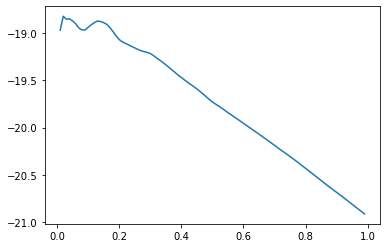

In [93]:
plt.plot(alpha,error)

In [94]:
# I wnat to know what is the best value of alpha

err=tuple(zip(alpha,error))
df_err=pd.DataFrame(err,columns=['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
1,0.02,-18.821149


In [95]:
# So the best value for alpha is 0.02

In [96]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
cross_val_score(rf,X_train,y_train, scoring='neg_mean_absolute_error', cv=3)  # by default cv=5

array([-14.68717172, -14.29333333, -14.29182741])

In [97]:
np.mean(cross_val_score(rf,X_train,y_train, scoring='neg_mean_absolute_error', cv=3))  # by default cv=5

-14.661601847579007

In [98]:
 # it is obvious that Random forrest is the best so I will tune the model using GridSearchCV

In [99]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10,100,10),'criterion':('squared_error', 'absolute_error','poisson'),'max_features':('auto','sqrt', 'log2')}

gs=GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error',
                                       'poisson'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 100, 10)},
             scoring='neg_mean_absolute_error')

In [100]:
print("best parameters: ", gs.best_params_)
print("best score: ", gs.best_score_)

best parameters:  {'criterion': 'squared_error', 'max_features': 'auto', 'n_estimators': 70}
best score:  -14.445185600261743


In [101]:
gs.best_estimator_.fit(X_train,y_train)
tpred=gs.best_estimator_.predict(X_test)

In [102]:
from sklearn.metrics import mean_absolute_error


mean_absolute_error(y_test,tpred)

11.27464046021093

In [108]:
# now I want to save the model

import pickle
with open('D:\\Data Science\\Projects\\salary\\salary_pred_model','wb') as f:
    pickle.dump(gs.best_estimator_,f)
    

In [109]:
import json

columns={
    'data_columns' : [col.lower() for col in X.columns]
}

with open('D:\\Data Science\\Projects\\salary\\columns.json','w') as f:
    f.write(json.dumps(columns))